In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

In [5]:
# Simulate data
# variables fijas
#      género, plataforma y amigos
np.random.seed(42)
n_samples = 100000
data = pd.DataFrame({
    'Precio': np.random.choice(['Alta', 'Medio', 'Bajo'], size=n_samples, p=[0.7, 0.2, 0.1]),
    'Genero': np.random.choice(['Aventura'], size=n_samples, p=[1]),
    'Criticas': np.random.choice(['Alta', 'Baja'], size=n_samples, p=[0.6, 0.4]),
    'Plataforma': np.random.choice(['PC'], size=n_samples, p=[1]),
    'Amigos': np.random.choice(['Si'], size=n_samples, p=[1]),
    'Compra': np.random.choice(['Si', 'No'], size=n_samples, p=[0.05, 0.95])
})

In [6]:
# Adjust probabilities based on contamination and smoking status
data.loc[(data['Precio'] == 'Alta') & (data['Genero'] == 'Aventura') & (data['Criticas'] == 'Alta') & (data['Plataforma'] == 'PC') & (data['Amigos'] == 'Si'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.05, 0.95], size=len(data[(data['Precio'] == 'Alta') & (data['Genero'] == 'Aventura') & (data['Criticas'] == 'Alta') & (data['Plataforma'] == 'PC') & (data['Amigos'] == 'Si')]))
data.loc[(data['Precio'] == 'Medio') & (data['Genero'] == 'Aventura') & (data['Criticas'] == 'Alta') & (data['Plataforma'] == 'PC') & (data['Amigos'] == 'Si'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.02, 0.98], size=len(data[(data['Precio'] == 'Medio') & (data['Genero'] == 'Aventura') & (data['Criticas'] == 'Alta') & (data['Plataforma'] == 'PC') & (data['Amigos'] == 'Si')]))
data.loc[(data['Precio'] == 'Bajo') & (data['Genero'] == 'Aventura') & (data['Criticas'] == 'Alta') & (data['Plataforma'] == 'PC') & (data['Amigos'] == 'Si'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.03, 0.97], size=len(data[(data['Precio'] == 'Bajo') & (data['Genero'] == 'Aventura') & (data['Criticas'] == 'Alta') & (data['Plataforma'] == 'PC') & (data['Amigos'] == 'Si')]))
data.loc[(data['Precio'] == 'Alta') & (data['Genero'] == 'Aventura') & (data['Criticas'] == 'Baja') & (data['Plataforma'] == 'PC') & (data['Amigos'] == 'Si'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.001, 0.999], size=len(data[(data['Precio'] == 'Alta') & (data['Genero'] == 'Aventura') & (data['Criticas'] == 'Baja') & (data['Plataforma'] == 'PC') & (data['Amigos'] == 'Si')]))
data.loc[(data['Precio'] == 'Medio') & (data['Genero'] == 'Aventura') & (data['Criticas'] == 'Baja') & (data['Plataforma'] == 'PC') & (data['Amigos'] == 'Si'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.4, 0.6], size=len(data[(data['Precio'] == 'Medio') & (data['Genero'] == 'Aventura') & (data['Criticas'] == 'Baja') & (data['Plataforma'] == 'PC') & (data['Amigos'] == 'Si')]))
data.loc[(data['Precio'] == 'Bajo') & (data['Genero'] == 'Aventura') & (data['Criticas'] == 'Baja') & (data['Plataforma'] == 'PC') & (data['Amigos'] == 'Si'), 'Compra'] = np.random.choice(['Sí', 'No'], p=[0.03, 0.97], size=len(data[(data['Precio'] == 'Bajo') & (data['Genero'] == 'Aventura') & (data['Criticas'] == 'Baja') & (data['Plataforma'] == 'PC') & (data['Amigos'] == 'Si')]))

In [7]:
# Encode categorical variables
encoder = OrdinalEncoder()
x = encoder.fit_transform(data[['Precio', 'Genero', 'Criticas', 'Plataforma', 'Amigos']])
y = data['Compra'].map({'No': 0, 'Sí': 1})

In [8]:
# Train Naive Bayes model
model = CategoricalNB()
model.fit(x, y)

# Predict probabilities for each combination
combinations = pd.DataFrame({
    'Precio': ['Alta', 'Medio', 'Bajo', 'Alta', 'Medio', 'Bajo'],
    'Genero': ['Aventura', 'Aventura', 'Aventura', 'Aventura', 'Aventura', 'Aventura'],
    'Criticas': ['Alta', 'Alta', 'Alta', 'Baja', 'Baja', 'Baja'],
    'Plataforma': ['PC', 'PC', 'PC', 'PC', 'PC', 'PC'],
    'Amigos': ['Si', 'Si', 'Si', 'Si', 'Si', 'Si'],
})
X_new = encoder.transform(combinations)
probs = model.predict_proba(X_new)

In [ ]:
# Add probabilities to the combinations DataFrame
combinations['P(Compra = No)'] = probs[:, 0]
combinations['P(Compra = Sí)'] = probs[:, 1]

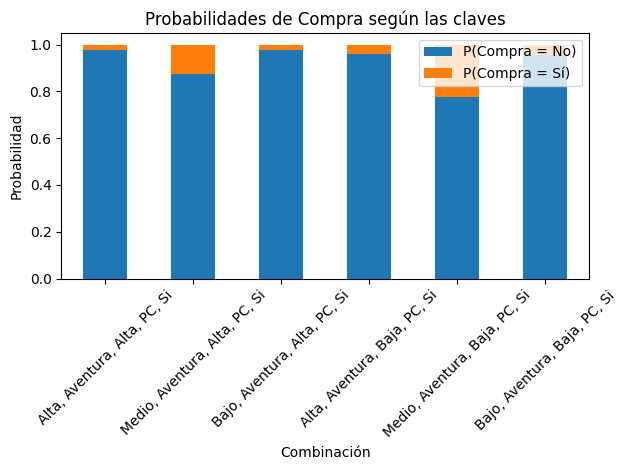

In [10]:
# Combine 'Contaminación' and 'Fumador' into a single label for the x-axis
combinations['Etiqueta'] = combinations.apply(lambda row: f"{row['Precio']}, {row['Genero']}, {row['Criticas']}, {row['Plataforma']}, {row['Amigos']}", axis=1)

# Plot the probabilities
combinations.plot(x='Etiqueta', y=['P(Compra = No)', 'P(Compra = Sí)'], kind='bar', stacked=True)
plt.title('Probabilidades de Compra según las claves')
plt.xlabel('Combinación')
plt.ylabel('Probabilidad')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

# Save the plot
plt.savefig('probabilidades_condicionales_compra_naive_bayes.png')